In [5]:
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import scipy.stats as stats
import pandas as pd
sns.set()

# Zad 1

In [84]:
def regression(nu, n, simulations, beta_0, beta_1, dist='t', sigma=1):
    x = np.linspace(0, 10, n)
    beta_0_estimated, beta_1_estimated = [], []
    
    for _ in range(simulations):
        if dist == 't':
            eps = stats.t.rvs(df=nu, size=n)
        else:
            eps = np.random.normal(0, sigma, size=n)
        
        y = beta_0 + beta_1 * x + eps
        x_hat, y_hat = np.mean(x), np.mean(y)
        beta_1_estim = np.sum((x - x_hat) * (y - y_hat)) / np.sum((x - x_hat)**2)
        beta_0_estim = y_hat - beta_1_estim * x_hat

        beta_0_estimated.append(beta_0_estim)
        beta_1_estimated.append(beta_1_estim)

    theoretical_var_b1 = (nu / (nu - 2)) / np.sum((x - np.mean(x))**2)
    theoretical_var_b0 = (nu / (nu - 2)) * (1 / n + np.mean(x)**2 / np.sum((x - np.mean(x))**2))

    mean_beta_0, var_beta_0 = np.mean(beta_0_estimated), np.var(beta_0_estimated)
    mean_beta_1, var_beta_1 = np.mean(beta_1_estimated), np.var(beta_1_estimated)
    
    return theoretical_var_b1, theoretical_var_b0, mean_beta_0, var_beta_0, mean_beta_1, var_beta_1

In [85]:
simulations=1000
nu_values=[3,4,5,7,10,15,20,25]
n_values=[100,200,400,600,800,1000]
beta_0=1
beta_1=2

for nu in nu_values:
    for n in n_values:
        theoretical_var_b1, theoretical_var_b0, mean_beta_0, var_beta_0, mean_beta_1, var_beta_1=regression(nu,n,simulations,beta_0,beta_1)
        print(f'Dla nu={nu},n={n}, mean b0={mean_beta_0}, var beta0={var_beta_0}, var_theo beta0={theoretical_var_b0}, mean beta1={mean_beta_1}, var beta1={var_beta_1}, var_theo beta1={theoretical_var_b1}')

Dla nu=3,n=100, mean b0=0.995980955700044, var beta0=0.11544498182581191, var_theo beta0=0.11821782178217821, mean beta1=2.001593056825217, var beta1=0.00357577602008003, var_theo beta1=0.003528712871287129
Dla nu=3,n=200, mean b0=0.9940727479300422, var beta0=0.05907707786904461, var_theo beta0=0.05955223880597016, mean beta1=2.0008866172301563, var beta1=0.0017041219862708986, var_theo beta1=0.001782089552238806
Dla nu=3,n=400, mean b0=1.0013540424367198, var beta0=0.027846501349145788, var_theo beta0=0.029887780548628437, mean beta1=1.9991870776753997, var beta1=0.0008159212711404851, var_theo beta1=0.0008955112219451373
Dla nu=3,n=600, mean b0=0.9992236382176474, var beta0=0.020521815855520997, var_theo beta0=0.019950083194675537, mean beta1=2.000002263206871, var beta1=0.0006045770153383625, var_theo beta1=0.0005980033277870216
Dla nu=3,n=800, mean b0=0.9985301214650419, var beta0=0.014998270004327938, var_theo beta0=0.014971910112359552, mean beta1=2.0008161289801785, var beta1=0

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

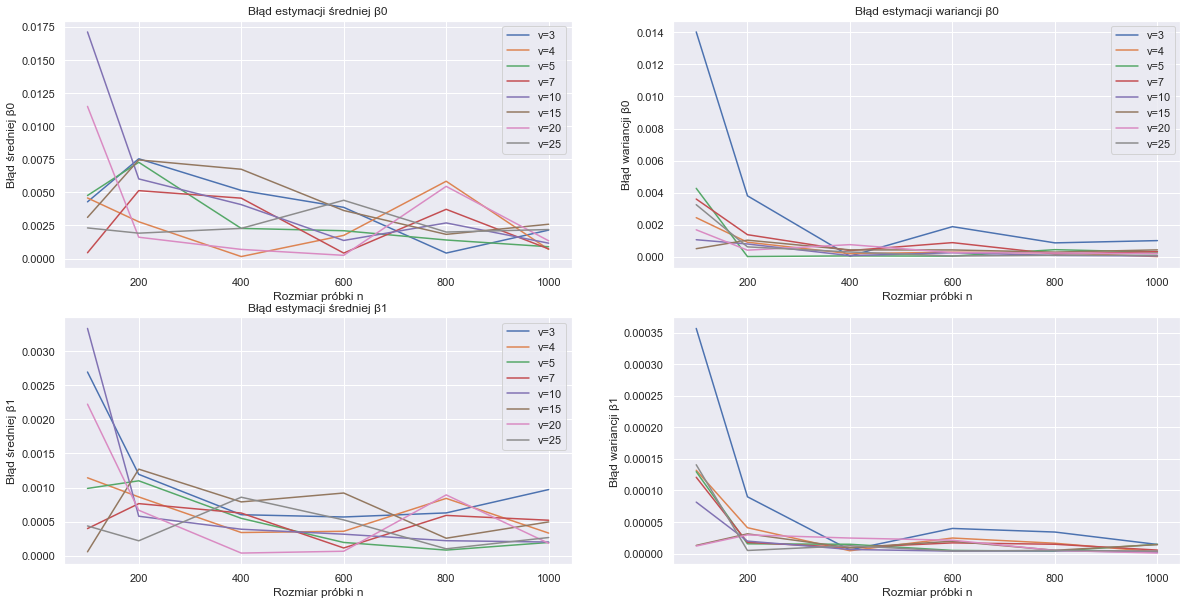

In [86]:
results_b0 = {nu: {'n': [], 'mean_error': [], 'var_error': []} for nu in nu_values}
results_b1 = {nu: {'n': [], 'mean_error': [], 'var_error': []} for nu in nu_values}

for nu in nu_values:
    for n in n_values:
        theoretical_var_b1, theoretical_var_b0, mean_b0, var_b0, mean_b1, var_b1 = regression(nu, n, simulations, beta_0, beta_1)
        results_b0[nu]['n'].append(n)
        results_b0[nu]['mean_error'].append(abs(mean_b0 - beta_0))
        results_b0[nu]['var_error'].append(abs(var_b0 - theoretical_var_b0))

        results_b1[nu]['n'].append(n)
        results_b1[nu]['mean_error'].append(abs(mean_b1 - beta_1))
        results_b1[nu]['var_error'].append(abs(var_b1 - theoretical_var_b1))

# Tworzenie wykresów
plt.figure(figsize=(20, 10))

# Błąd estymacji średniej beta0
plt.subplot(2, 2, 1)
for nu, data in results_b0.items():
    plt.plot(data['n'], data['mean_error'], label=f'ν={nu}')
plt.xlabel('Rozmiar próbki n')
plt.ylabel('Błąd średniej β0')
plt.title('Błąd estymacji średniej β0')
plt.legend()

# Błąd estymacji wariancji beta0
plt.subplot(2, 2, 2)
for nu, data in results_b0.items():
    plt.plot(data['n'], data['var_error'], label=f'ν={nu}')
plt.xlabel('Rozmiar próbki n')
plt.ylabel('Błąd wariancji β0')
plt.title('Błąd estymacji wariancji β0')
plt.legend()

# Błąd estymacji średniej beta1
plt.subplot(2, 2, 3)
for nu, data in results_b1.items():
    plt.plot(data['n'], data['mean_error'], label=f'ν={nu}')
plt.xlabel('Rozmiar próbki n')
plt.ylabel('Błąd średniej β1')
plt.title('Błąd estymacji średniej β1')
plt.legend()

# Błąd estymacji wariancji beta1
plt.subplot(2, 2, 4)
for nu, data in results_b1.items():
    plt.plot(data['n'], data['var_error'], label=f'ν={nu}')
plt.xlabel('Rozmiar próbki n')
plt.ylabel('Błąd wariancji β1')
plt.title

# Zad 2

In [87]:
n=1000
beta_1=10

In [88]:
def simulate_beta_hat(n,beta_1,sigma):
    x=np.linspace(0,10,n)
    epsilon=np.random.normal(0,sigma,n)
    y=beta_1*x+epsilon
    beta_hat=np.sum(x*y)/np.sum(x**2)
    varx_theo=sigma/np.sum(x**2)

    return beta_hat,varx_theo

In [89]:
sigmas=[3,4,10,15,25]
means=[]
vars=[]
for sigma in sigmas:
    beta_hat,varx_theo=simulate_beta_hat(n,beta_1,sigma)
    ex=np.mean(beta_hat)
    varx=np.var(beta_hat)
    abs_value_mean=np.abs(ex-beta_1)
    abs_value_var=np.abs(varx-varx_theo)
    print(f'Dla n={n}, sigma={sigma}: mean={ex}, var={varx}, abs value of mean={abs_value_mean}, abs value of var={abs_value_var}')
    means.append(np.mean(beta_hat))
    vars.append(np.var(beta_hat))

Dla n=1000, sigma=3: mean=10.001564364484777, var=0.0, abs value of mean=0.0015643644847767035, abs value of var=8.995497748874437e-05
Dla n=1000, sigma=4: mean=9.97294517022845, var=0.0, abs value of mean=0.027054829771550715, abs value of var=0.00011993996998499249
Dla n=1000, sigma=10: mean=9.96435464620098, var=0.0, abs value of mean=0.03564535379901912, abs value of var=0.0002998499249624812
Dla n=1000, sigma=15: mean=10.10812637230467, var=0.0, abs value of mean=0.10812637230466926, abs value of var=0.0004497748874437218
Dla n=1000, sigma=25: mean=9.914448116702463, var=0.0, abs value of mean=0.08555188329753705, abs value of var=0.000749624812406203


In [90]:
sigmas=[3,4,10,15,25]
means=[]
vars=[]
ns=[10,20,30,40,50,100,200,300,400,500,1000]
for sigma in sigmas:
    for n in ns:
        beta_hat,varx_theo=simulate_beta_hat(n,beta_1,sigma)
        ex=np.mean(beta_hat)
        varx=np.var(beta_hat)
        abs_value_mean=np.abs(ex-beta_1)
        abs_value_var=np.abs(varx-varx_theo)
        print(f'Dla n={n}, sigma={sigma}: mean={ex}, var={varx}, abs value of mean={abs_value_mean}, abs value of var={abs_value_var}')
        means.append(np.mean(beta_hat))
        vars.append(np.var(beta_hat))
        

Dla n=10, sigma=3: mean=10.192174034583127, var=0.0, abs value of mean=0.1921740345831271, abs value of var=0.008526315789473684
Dla n=20, sigma=3: mean=9.981775155558639, var=0.0, abs value of mean=0.0182248444413613, abs value of var=0.004384615384615384
Dla n=30, sigma=3: mean=9.89822567523151, var=0.0, abs value of mean=0.10177432476849013, abs value of var=0.002949152542372881
Dla n=40, sigma=3: mean=9.933169482619949, var=0.0, abs value of mean=0.06683051738005119, abs value of var=0.0022215189873417726
Dla n=50, sigma=3: mean=9.872644249438851, var=0.0, abs value of mean=0.1273557505611489, abs value of var=0.0017818181818181817
Dla n=100, sigma=3: mean=9.993949927884698, var=0.0, abs value of mean=0.006050072115302285, abs value of var=0.0008954773869346734
Dla n=200, sigma=3: mean=10.08656985840205, var=0.0, abs value of mean=0.08656985840205067, abs value of var=0.0004488721804511278
Dla n=300, sigma=3: mean=9.988064571539946, var=0.0, abs value of mean=0.011935428460054354, 

In [91]:
def simulate_beta_hat(n, sigma, beta_1, num_simulations=1000):
    beta_hats = []
    for _ in range(num_simulations):
        x = np.random.uniform(-1, 1, n)
        epsilon = np.random.normal(0, sigma, n)
        y = beta_1 * x + epsilon
        beta_hat = np.sum(x * y) / np.sum(x**2)
        beta_hats.append(beta_hat)
    return np.array(beta_hats)


beta_1 = 1
sigmas = [3, 4, 10, 15, 25]
ns = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000,10000]


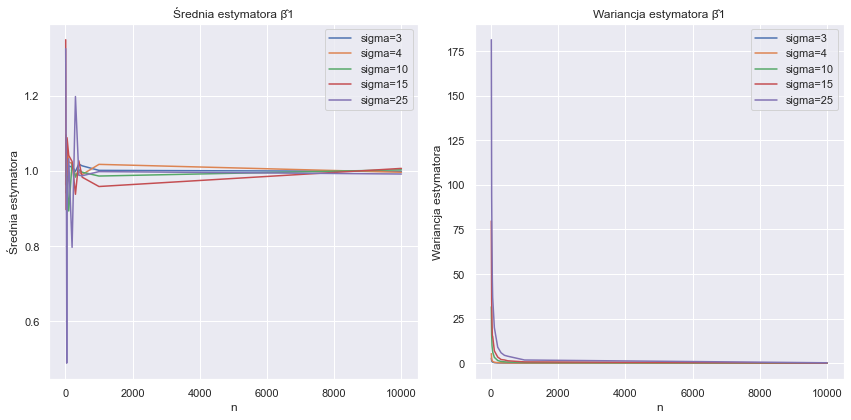

In [92]:
means = {sigma: [] for sigma in sigmas}
vars = {sigma: [] for sigma in sigmas}

for sigma in sigmas:
    for n in ns:
        beta_hats = simulate_beta_hat(n, sigma, beta_1)
        means[sigma].append(np.mean(beta_hats))
        vars[sigma].append(np.var(beta_hats))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for sigma in sigmas:
    plt.plot(ns, means[sigma], label=f'sigma={sigma}')
plt.xlabel('n')
plt.ylabel('Średnia estymatora')
plt.title('Średnia estymatora β̂1')
plt.legend()

plt.subplot(1, 2, 2)
for sigma in sigmas:
    plt.plot(ns, vars[sigma], label=f'sigma={sigma}')
plt.xlabel('n')
plt.ylabel('Wariancja estymatora')
plt.title('Wariancja estymatora β̂1')
plt.legend()

plt.tight_layout()
plt.show()


# Zad 3

In [93]:
def zad3(mc,n,beta_0=2,beta_1=4,sigma=1):
    beta_0_estimated=[]
    beta_1_estimated=[]
    for i in range(mc):
        x=np.random.uniform(0,10,n)
        epsilon=np.random.normal(0, sigma,n)
        y=beta_0 + beta_1*x + epsilon

        x_hat, y_hat = np.mean(x), np.mean(y)
        beta_1_estim = np.sum((x - x_hat) * (y - y_hat)) / np.sum((x - x_hat)**2)
        beta_0_estim = y_hat - beta_1_estim * x_hat

        beta_0_estimated.append(beta_0_estim)
        beta_1_estimated.append(beta_1_estim)

        beta_0_theoretical = np.random.normal(beta_0, np.sqrt(sigma**2*(1/n + np.mean(x)**2 / np.sum((x - np.mean(x))**2))),n)
        beta_1_theoretical = np.random.normal(beta_1, np.sqrt(sigma**2/(np.sum((x - np.mean(x))**2))), n)

    return beta_0_estimated,beta_1_estimated, beta_0_theoretical, beta_1_theoretical

In [94]:
mc=1000
n=1000
beta_0_estimated,beta_1_estimated, beta_0_theoretical, beta_1_theoretical=zad3(mc,n)
beta_0=2
beta_1=4
sigma=1

In [ ]:
F=stats.norm.cdf(x,)

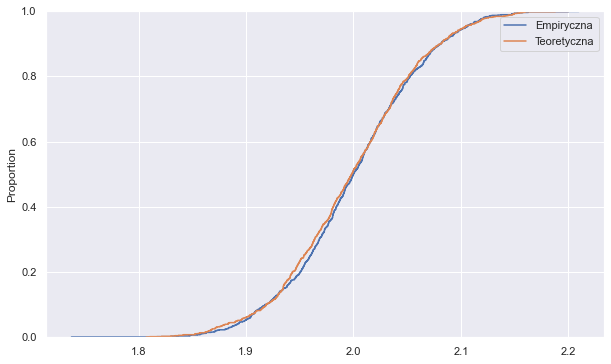

In [95]:
plt.figure(figsize=(10,6))
sns.ecdfplot(beta_0_estimated, label='Empiryczna')
sns.ecdfplot(beta_0_theoretical, label='Teoretyczna')
plt.legend()

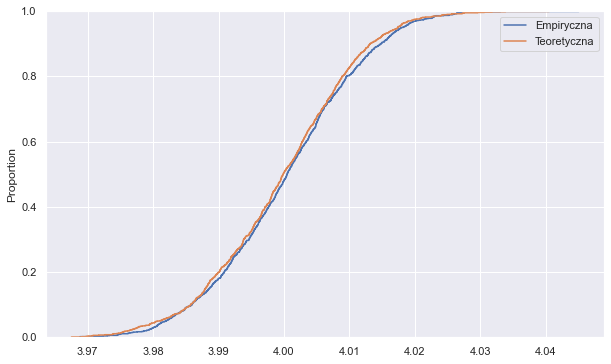

In [96]:
plt.figure(figsize=(10,6))
sns.ecdfplot(beta_1_estimated, label='Empiryczna')
sns.ecdfplot(beta_1_theoretical, label='Teoretyczna')
plt.legend()

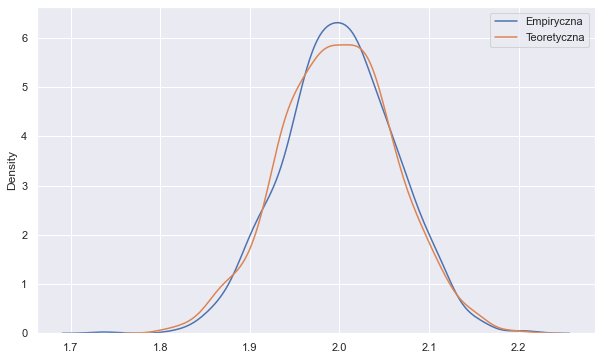

In [97]:
plt.figure(figsize=(10,6))
sns.kdeplot(beta_0_estimated, label='Empiryczna')
sns.kdeplot(beta_0_theoretical, label='Teoretyczna')
plt.legend()

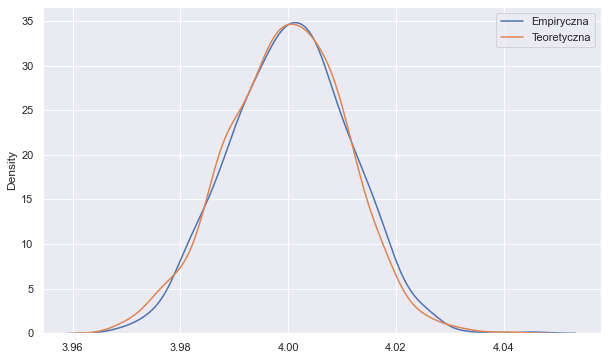

In [98]:
plt.figure(figsize=(10,6))
sns.kdeplot(beta_1_estimated, label='Empiryczna')
sns.kdeplot(beta_1_theoretical, label='Teoretyczna')
plt.legend()

# Zad 4

In [100]:
x = np.linspace(0, 10, 1000)
beta_0_estimated=np.array(beta_0_estimated)
beta_1_estimated=np.array(beta_1_estimated)
beta_0_student = (beta_0_estimated - beta_0)/np.sqrt(sigma**2*(1/n + np.mean(x)**2 / np.sum((x - np.mean(x))**2)))
beta_1_student = (beta_1_estimated - beta_1)/sigma*np.sqrt(np.sum((x - np.mean(x))**2))

In [102]:
beta_0_student = (beta_0_estimated - beta_0)/np.sqrt(sigma**2*(1/n + np.mean(x)**2 / np.sum((x - np.mean(x))**2)))
beta_1_student = (beta_1_estimated - beta_1)/sigma*np.sqrt(np.sum((x - np.mean(x))**2))

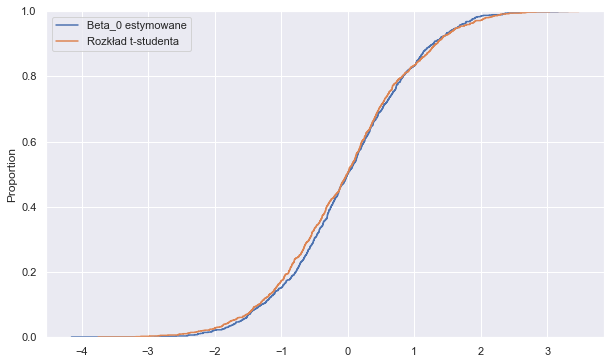

In [106]:
theoretical_student = np.random.standard_t(n-2, n)

plt.figure(figsize=(10,6))
sns.ecdfplot(beta_0_student, label = 'Beta_0 estymowane')
sns.ecdfplot(theoretical_student, label = 'Rozkład t-studenta')
plt.legend()

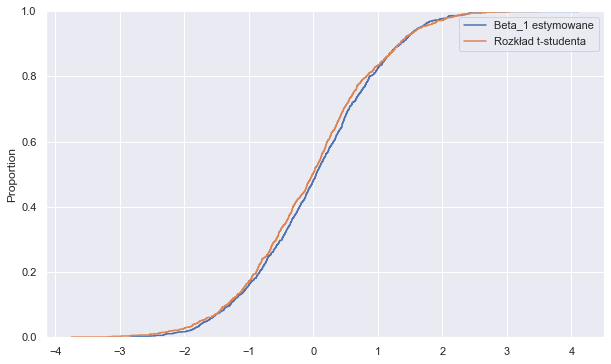

In [107]:
plt.figure(figsize=(10,6))
sns.ecdfplot(beta_1_student, label = 'Beta_1 estymowane')
sns.ecdfplot(theoretical_student, label = 'Rozkład t-studenta')
plt.legend()

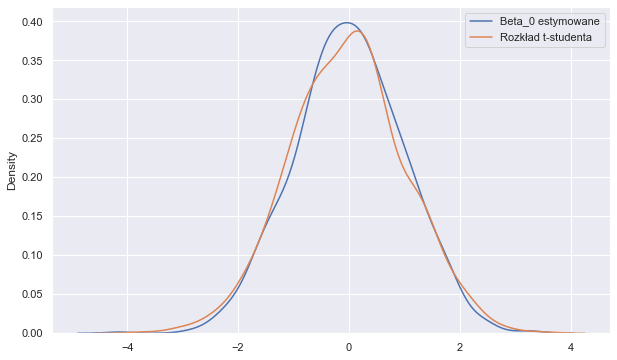

In [108]:
plt.figure(figsize=(10,6))
sns.kdeplot(beta_0_student, label = 'Beta_0 estymowane')
sns.kdeplot(theoretical_student, label = 'Rozkład t-studenta')
plt.legend()

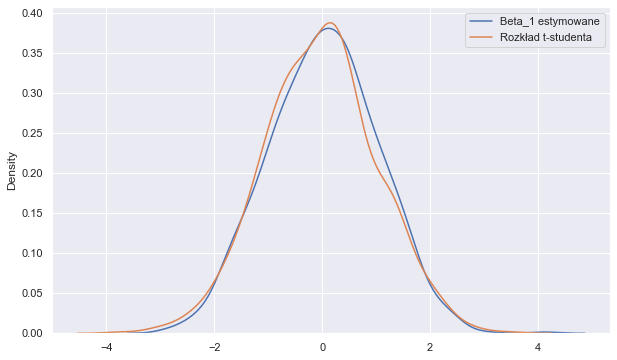

In [110]:
plt.figure(figsize=(10,6))
sns.kdeplot(beta_1_student, label = 'Beta_1 estymowane')
sns.kdeplot(theoretical_student, label = 'Rozkład t-studenta')
plt.legend()

# Zad 5

In [6]:
N = 1000
l = 500
sigma1_sq = 1
sigma2_sqs = [9, 4, 1.5]

In [18]:
def generate_data_and_calculate_Cj(N, sigma2_sq):
    X = np.random.normal(0, np.sqrt(sigma1_sq), l if N >= l else N // 2)
    Y = np.random.normal(0, np.sqrt(sigma2_sq), N - len(X))
    data = np.concatenate((X, Y))
    Cj = np.cumsum(data**2)
    return data, Cj

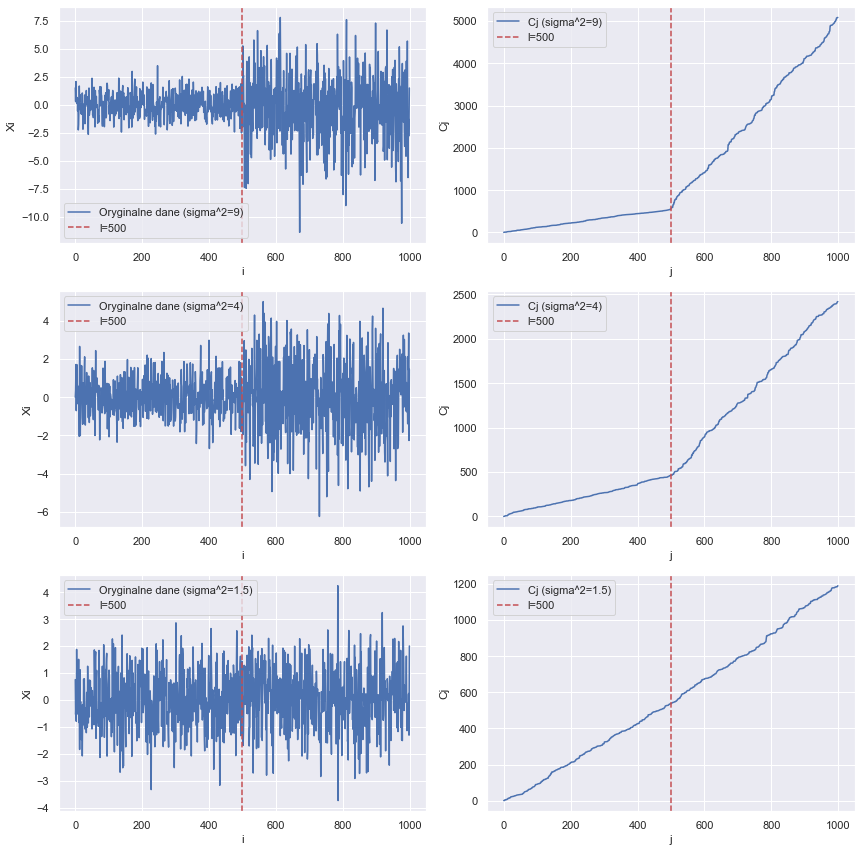

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
for i, sigma2_sq in enumerate(sigma2_sqs):
    data, Cj = generate_data_and_calculate_Cj(sigma2_sq)

    # Wykres oryginalnych danych
    axs[i, 0].plot(data, label=f'Oryginalne dane (sigma^2={sigma2_sq})')
    axs[i, 0].axvline(x=l, color='r', linestyle='--', label='l=500')
    axs[i, 0].legend()
    axs[i, 0].set_xlabel('i')
    axs[i, 0].set_ylabel('Xi')

    # Wykres wartości Cj
    axs[i, 1].plot(Cj, label=f'Cj (sigma^2={sigma2_sq})')
    axs[i, 1].axvline(x=l, color='r', linestyle='--', label='l=500')
    axs[i, 1].legend()
    axs[i, 1].set_xlabel('j')
    axs[i, 1].set_ylabel('Cj')

plt.tight_layout()
plt.show()

In [20]:
from scipy.stats import linregress
from numpy.linalg import lstsq

num_simulations = 100 # liczba symulacji
sigma1_sq = 1
sigma2_sqs = [0.1,0.5,0.9,1.1,1.5,2,3,5]

def perform_one_simulation(data, Cj, N):
    V_min = np.inf
    k_star = None

    for k in range(2, N - 2):
        A1 = np.vstack([range(1, k + 1), np.ones(k)]).T
        solution1 = lstsq(A1, Cj[:k], rcond=None)
        slope1, intercept1 = solution1[0]

        A2 = np.vstack([range(k + 1, N + 1), np.ones(N - k)]).T
        solution2 = lstsq(A2, Cj[k:], rcond=None)
        slope2, intercept2 = solution2[0]

        V_k = np.sum((Cj[:k] - (intercept1 + slope1 * np.arange(1, k + 1)))**2) + \
              np.sum((Cj[k:] - (intercept2 + slope2 * np.arange(k + 1, N + 1)))**2)

        if V_k < V_min:
            V_min = V_k
            k_star = k

    return k_star


In [21]:
# Rozmiary próbek do symulacji
sample_sizes = [500, 1000, 2000]

results_for_different_N = {N: {sigma2_sq: [] for sigma2_sq in sigma2_sqs} for N in sample_sizes}

for N in sample_sizes:
    for sigma2_sq in sigma2_sqs:
        for _ in range(100):
            data, Cj = generate_data_and_calculate_Cj(N, sigma2_sq)
            k_star = perform_one_simulation(data, Cj, N)
            results_for_different_N[N][sigma2_sq].append(k_star)

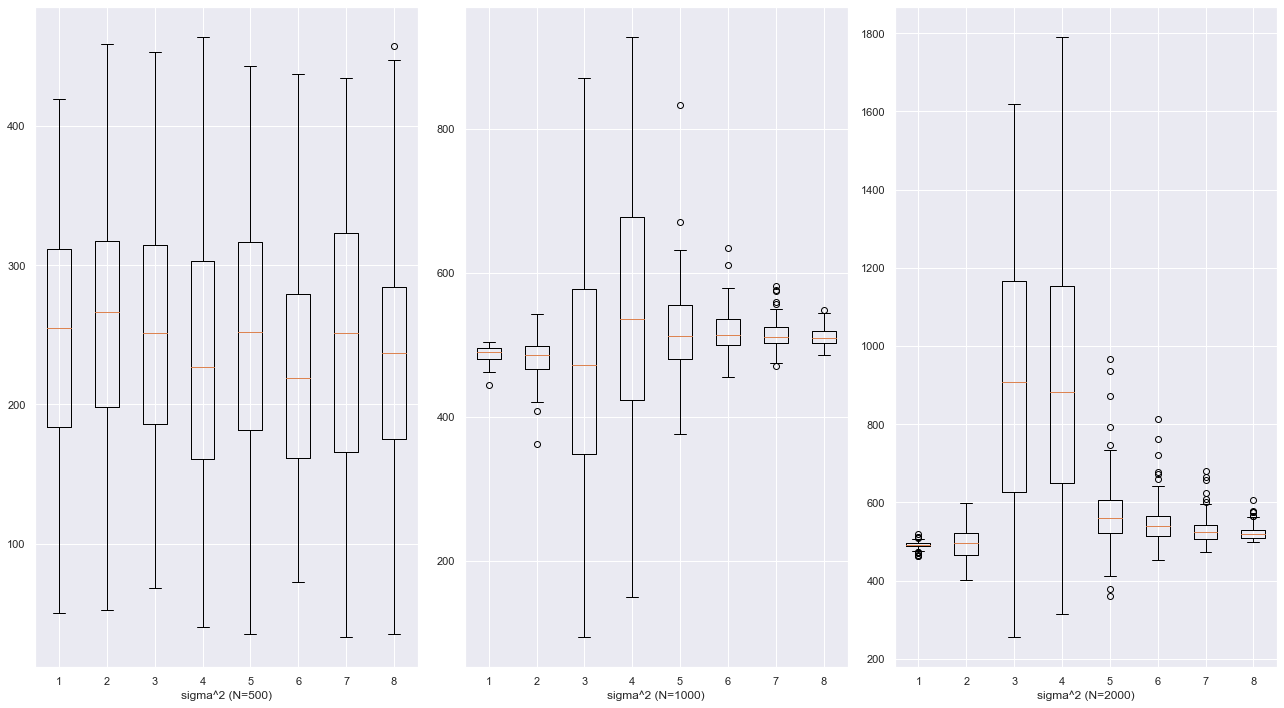

In [33]:
#Tworzenie boxplotów dla wyników symulacji Monte Carlo dla różnych N
plt.figure(figsize=(18,10))

# Tytuł wykresu
plt.title('Boxploty wyników symulacji Monte Carlo dla różnych N i sigma^2')

# Tworzenie i rysowanie boxplotów
for i, N in enumerate(sample_sizes):
    plt.subplot(1, len(sample_sizes), i + 1)
    plt.boxplot([results_for_different_N[N][sigma2_sq] for sigma2_sq in sigma2_sqs])
    plt.xlabel(f'sigma^2 (N={N})')
    #plt.ylabel('Wyznaczony punkt zmiany reżimu k*')
    #plt.axhline(y=l if N >= l else N // 2, color='r', linestyle='--', label='Prawdziwy punkt zmiany')
    #plt.legend()

# Wyświetlanie wykresu
plt.tight_layout()
plt.show()